In [494]:
!pip install matplotlib seaborn


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [495]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [471]:
df = pd.read_csv("final_output.csv").iloc[:, 1:]

In [472]:
df.fillna(-1, inplace=True)
df.drop('is_verified', axis=1, inplace=True)

In [473]:
head_movement_range = (-20, 20)

In [474]:
df['head_yaw'] = ((df['head_yaw'] >= head_movement_range[0]) & (df['head_yaw'] <= head_movement_range[1]))
df['head_movement'] = df['head_yaw'].apply(lambda x: 0 if x else 1)
df.drop(['head_yaw', 'head_pitch'], axis=1, inplace=True)

In [475]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['seconds_diff'] = round(df['timestamp'].diff().dt.total_seconds(), 2)
df['seconds_diff'] = df['seconds_diff'].fillna(0)

In [476]:
df

,timestamp,face_path,eye_state,yawn_results,presenting_state,head_movement,seconds_diff
0,2025-04-02 09:55:14.704410,faces\face_1743567914704.jpg,1.0,1.0,0,0,0.00
1,2025-04-02 09:55:18.667139,faces\face_1743567918667.jpg,1.0,1.0,0,0,3.96
2,2025-04-02 09:55:21.372087,faces\face_1743567921372.jpg,0.0,0.0,0,0,2.70
3,2025-04-02 09:55:23.892175,faces\face_1743567923892.jpg,0.0,1.0,0,0,2.52
4,2025-04-02 09:55:26.531496,faces\face_1743567926531.jpg,0.0,1.0,0,0,2.64
5,2025-04-02 09:55:28.994310,faces\face_1743567928994.jpg,1.0,1.0,0,0,2.46
6,2025-04-02 09:55:31.682966,faces\face_1743567931682.jpg,1.0,1.0,0,0,2.69
7,2025-04-02 09:55:34.366696,faces\face_1743567934366.jpg,0.0,1.0,0,0,2.68
8,2025-04-02 09:55:36.845037,faces\face_1743567936845.jpg,0.0,1.0,0,0,2.48
9,2025-04-02 09:55:39.371898,faces\face_1743567939371.jpg,0.0,1.0,0,0,2.53


In [477]:
sum(df['seconds_diff'])

92.18000000000002

In [492]:
# Create 10-second bins
df['time_bin'] = df['timestamp'].dt.floor('10S')

# Group by the time bins and calculate percentages for each column
grouped = df.groupby('time_bin').agg({
    'face_path': 'count',  # total entries in the bin
    'eye_state': lambda x: (x == 1).mean() * 100,  # % of 1s in eye_state
    'yawn_results': lambda x: (x == 1).mean() * 100,  # % of 1s in yawn_results
    'presenting_state': lambda x: (x == 1).mean() * 100,  # % of 1s in presenting_state
    'head_movement': lambda x: (x == 1).mean() * 100  # % of 1s in head_movement
}).rename(columns={
    'face_path': 'total_samples',
    'eye_state': 'eye_open_percent',
    'yawn_results': 'yawn_percent',
    'presenting_state': 'presenting_percent',
    'head_movement': 'head_movement_percent'
})

# Reset index to make time_bin a column
grouped = grouped.reset_index()

grouped

C:\Users\anekant.jain\AppData\Local\Temp\ipykernel_20056\3269095561.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['time_bin'] = df['timestamp'].dt.floor('10S')


,time_bin,total_samples,eye_open_percent,yawn_percent,presenting_percent,head_movement_percent
0,2025-04-02 09:55:10,2,100.000000,100.000000,0.0,0.000000
1,2025-04-02 09:55:20,4,25.000000,75.000000,0.0,0.000000
2,2025-04-02 09:55:30,4,25.000000,100.000000,0.0,0.000000
3,2025-04-02 09:55:40,4,50.000000,50.000000,0.0,50.000000
4,2025-04-02 09:55:50,1,100.000000,0.000000,0.0,100.000000
5,2025-04-02 09:56:00,4,0.000000,0.000000,100.0,0.000000
6,2025-04-02 09:56:10,5,40.000000,20.000000,60.0,20.000000
7,2025-04-02 09:56:20,4,50.000000,50.000000,0.0,50.000000
8,2025-04-02 09:56:30,3,66.666667,33.333333,0.0,66.666667
9,2025-04-02 09:56:40,3,100.000000,33.333333,0.0,100.000000


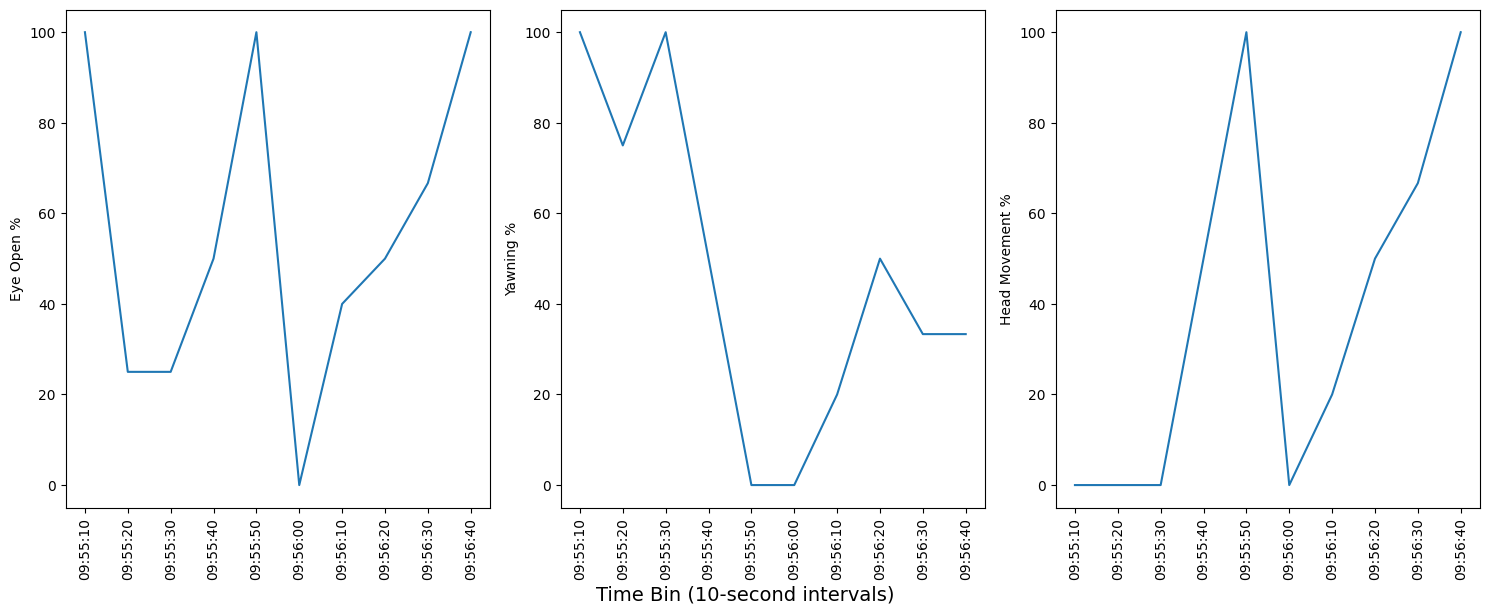

In [532]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

ax[0].plot(grouped['time_bin'], grouped['eye_open_percent'])
ax[0].set_ylabel("Eye Open %")

ax[1].plot(grouped['time_bin'], grouped['yawn_percent'])
ax[1].set_ylabel("Yawning %")

ax[2].plot(grouped['time_bin'], grouped['head_movement_percent'])
ax[2].set_ylabel("Head Movement %")

for axis in ax:
    axis.tick_params(axis='x', rotation=90)

fig.text(0.5, 0.0001, 'Time Bin (10-second intervals)', ha='center', va='center', fontsize=14)

plt.tight_layout()
plt.show()

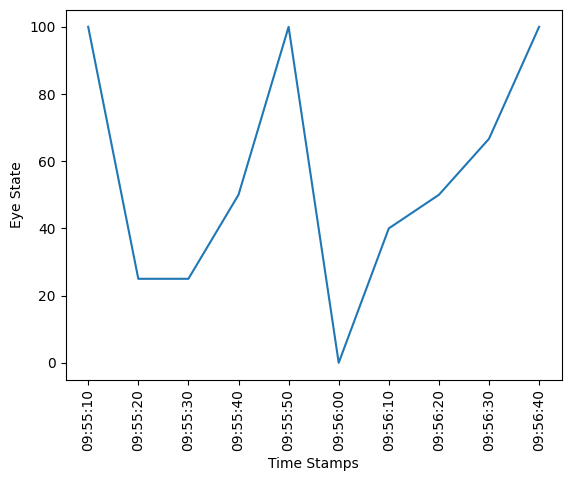

In [502]:
plt.plot(grouped['time_bin'], grouped['eye_open_percent'])
plt.xlabel("Time Stamps")
plt.ylabel("Eye State")
plt.xticks(rotation='vertical')
plt.show()

## Presentation

In [478]:
presentation_ss_df = df[df['presenting_state'] == 1]
print("Total Presentation Time is", round(sum(presentation_ss_df['seconds_diff']), 2), "seconds")
print("Presentation slides are", presentation_ss_df.shape[0])

Total Presentation Time is 23.33 seconds
Presentation slides are 7


## Head State

In [480]:
is_moving = df[(df['head_movement'] == 1) & (df['presenting_state'] == 0)].shape[0] # Moving
not_moving = df[(df['head_movement'] == 0) & (df['presenting_state'] == 0)].shape[0] # Not moving
total_val = df.shape[0] - presentation_ss_df.shape[0]

print(is_moving, round((is_moving / total_val) * 100, 1))
print(not_moving, round((not_moving / total_val) * 100, 1))

11 40.7
16 59.3


In [489]:
df['group'] = (df['head_movement'] != df['head_movement'].shift()).cumsum()

consecutive_counts = df.groupby(['head_movement', 'group']).size().reset_index(name='count')

problematic_periods = consecutive_counts[(consecutive_counts['head_movement'] == 1) & 
                                        (consecutive_counts['count'] > 1)]

# Now let's find the actual time periods where this occurs
results = []
for _, row in problematic_periods.iterrows():
    group_id = row['group']
    start_idx = df[df['group'] == group_id].index[0]
    end_idx = df[df['group'] == group_id].index[-1]
    
    start_time = df.loc[start_idx, 'timestamp']
    end_time = df.loc[end_idx, 'timestamp']
    duration = (end_time - start_time).total_seconds()
    
    results.append({
        'start_time': start_time,
        'end_time': end_time,
        'duration_seconds': duration,
        'consecutive_frames': row['count']
    })

# Convert results to a dataframe
results_df = pd.DataFrame(results)
results_df

,start_time,end_time,duration_seconds,consecutive_frames
0,2025-04-02 09:55:46.852918,2025-04-02 09:55:51.171428,4.318510,3
1,2025-04-02 09:56:18.794389,2025-04-02 09:56:23.900187,5.105798,3
2,2025-04-02 09:56:33.611449,2025-04-02 09:56:46.859334,13.247885,5


## Eye State

In [481]:
head_opened_mask = (
    (df['eye_state'] == -1) & 
    (df['head_movement'] == 1) &
    (df['presenting_state'] == 0)
)
head_closed_mask = (
    (df['eye_state'] == -1) & 
    (df['head_movement'] == 0) & 
    (df['presenting_state'] == 0)
)


df.loc[head_opened_mask, 'eye_state'] = 1
df.loc[head_closed_mask, 'eye_state'] = 0

In [482]:
total_opened = df[df['eye_state'] == 1].shape[0] # Opened
total_closed = df[df['eye_state'] == 0].shape[0] # Closed

print(total_opened, round((total_opened / (df.shape[0] - presentation_ss_df.shape[0]) * 100), 1))
print(total_closed, round((total_closed / (df.shape[0] - presentation_ss_df.shape[0]) * 100), 1))

16 59.3
11 40.7


#### Head while -1 in eye_state

In [483]:
df[(df['presenting_state'] == 0) & (df['eye_state'] == -1)]

,timestamp,face_path,eye_state,yawn_results,presenting_state,head_movement,seconds_diff


In [484]:
df['group'] = (df['eye_state'] != df['eye_state'].shift()).cumsum()

consecutive_counts = df.groupby(['eye_state', 'group']).size().reset_index(name='count')

problematic_periods = consecutive_counts[(consecutive_counts['eye_state'] == 0) & 
                                        (consecutive_counts['count'] > 1)]

# Now let's find the actual time periods where this occurs
results = []
for _, row in problematic_periods.iterrows():
    group_id = row['group']
    start_idx = df[df['group'] == group_id].index[0]
    end_idx = df[df['group'] == group_id].index[-1]
    
    start_time = df.loc[start_idx, 'timestamp']
    end_time = df.loc[end_idx, 'timestamp']
    duration = (end_time - start_time).total_seconds()
    
    results.append({
        'start_time': start_time,
        'end_time': end_time,
        'duration_seconds': duration,
        'consecutive_frames': row['count']
    })

# Convert results to a dataframe
results_df = pd.DataFrame(results)
results_df

,start_time,end_time,duration_seconds,consecutive_frames
0,2025-04-02 09:55:21.372087,2025-04-02 09:55:26.531496,5.159409,3.0
1,2025-04-02 09:55:34.366696,2025-04-02 09:55:44.316706,9.950010,5.0
2,2025-04-02 09:56:26.481045,2025-04-02 09:56:31.274295,4.793250,3.0


## Yawn Status

In [485]:
total_opened = df[df['yawn_results'] == 1].shape[0] # Not yawning
total_closed = df[df['yawn_results'] == 0].shape[0] # Yawning

print(total_opened, round((total_opened / (df.shape[0] - presentation_ss_df.shape[0]) * 100), 1))
print(total_closed, round((total_closed / (df.shape[0] - presentation_ss_df.shape[0]) * 100), 1))

16 59.3
11 40.7


In [486]:
df[(df['yawn_results'] == 0) & (df['eye_state'] == -1)]

,timestamp,face_path,eye_state,yawn_results,presenting_state,head_movement,seconds_diff,group


In [487]:
df['group'] = (df['yawn_results'] != df['yawn_results'].shift()).cumsum()

consecutive_counts = df.groupby(['yawn_results', 'group']).size().reset_index(name='count')

problematic_periods = consecutive_counts[(consecutive_counts['yawn_results'] == 0) & 
                                        (consecutive_counts['count'] > 1)]

# Now let's find the actual time periods where this occurs
results = []
for _, row in problematic_periods.iterrows():
    group_id = row['group']
    start_idx = df[df['group'] == group_id].index[0]
    end_idx = df[df['group'] == group_id].index[-1]
    
    start_time = df.loc[start_idx, 'timestamp']
    end_time = df.loc[end_idx, 'timestamp']
    duration = (end_time - start_time).total_seconds()
    
    results.append({
        'start_time': start_time,
        'end_time': end_time,
        'duration_seconds': duration,
        'consecutive_frames': row['count']
    })

# Convert results to a dataframe
results_df = pd.DataFrame(results)
results_df

,start_time,end_time,duration_seconds,consecutive_frames
0,2025-04-02 09:55:46.852918,2025-04-02 09:55:51.171428,4.318510,3.0
1,2025-04-02 09:56:18.794389,2025-04-02 09:56:23.900187,5.105798,3.0
2,2025-04-02 09:56:33.611449,2025-04-02 09:56:42.113404,8.501955,3.0
